Autor:
* Percy Tornero (percytornero@gmail.com)

### 1. DEFINICIÓN DEL PROBLEMA

La compañía desea automatizar el proceso de elegibilidad de préstamos (en tiempo real) en función de los detalles del cliente proporcionados al completar el formulario de solicitud en línea.
**OBJETIVO: La CompañÍa necesita saber a quién sería conveniente aceptarle el préstamo hipotecario**, para así poder rentabilizar su capital y no tener problemas de morosidad o provisiones.


### 2. TIPOS DE VARIABLES


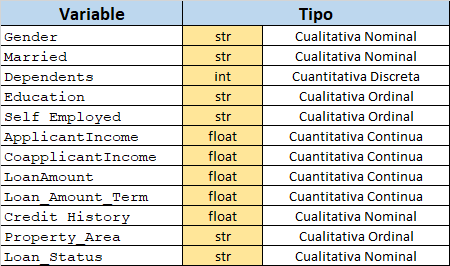

### 3. EVALUACIÓN DE LA INFORMACIÓN Y MÉTODOS CORRECTIVOS


En la descripción se indica que el problema es saber si es favorable aprobar un prestamo hipotecario, por lo que la variable objetivo es <b>'Loan_Status'</b>. Las demás variables se describen de la siguiente manera:
* <b>Gender:</b> Género del cliente
* <b>Married:</b> Estado civil del cliente
* <b>Dependents:</b> Número de hijos del cliente
* <b>Education:</b> Nivel de educación del cliente
* <b>Self Employed:</b> El cliente es empleado?
* <b>ApplicantIncome:</b> Ingreso proveniente de su trabajo como dependiente
* <b>CoapplicantIncome:</b> Ingreso proveniente de su trabajo como independiente
* <b>LoanAmount:</b> Monto del préstamo que el cliente tiene con la empresa
* <b>Loan_Amount_Term:</b> Término del periodo del préstamo que el cliente tiene con la empresa
* <b>Credit History:</b> Historial creticio del cliente o persona en el SSFF
* <b>Property_Area:</b> Área de residencia del cliente
* <b>Loan_Status:</b> Estado del pestamo?

In [1]:
#Importación de los datos
import pandas as pd
df_creditos = pd.read_csv('data_casos/AdquisicionCreditoHipotecario.csv')

In [2]:
# Visualización de datos
df_creditos.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Revisaremos la data y estructura de la información

In [3]:
#Visualizamos la cantidad de registros de la información
df_creditos.shape

(614, 13)

In [4]:
# Visualizamos las columnas de la información
df_creditos.columns

Index(['Loan ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Visualizamos tipos de variables y cantidad de registros por variable
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Podemos observar que no hay variables con valores nulos considerables, entonces consideramos
todas las variables para el análisis

Se observa que la variable target es cualitativa y para un mejor análisis optamos por cambiarlo a un tipo cuantitativo binario (1 y 0 )
- Donde :
* 1 --> Crédito aprobado
* 0 --> Crédito desaprobado

In [6]:
target='Loan_Status'
df_creditos[target] = df_creditos[target].map({'Y': 1, 'N':0})

In [7]:
# guardamos un backup de la base 
df_backup = df_creditos

# eliminamos la variable identificadora de la base
df_creditos = df_creditos.drop(columns = ['Loan ID'])

La variable "Dependents" está considerado como cualitativo por el cual debemos cambiar al tipo cuantitativo 

In [8]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
df_creditos['Dependents'] = df_creditos['Dependents'].map(mapping)

In [9]:
#Visualizamos la información corregida para iniciar el proceso de análisis
df_creditos.head(10)

,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


### 4. RESUMEN GLOBAL DE VARIABLES Y ANÁLISIS UNIVARIADO

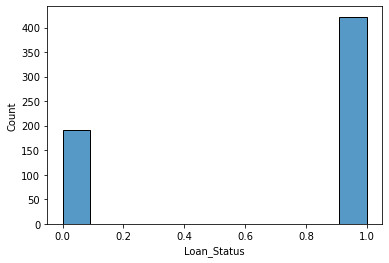

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_creditos['Loan_Status'])
plt.show()


In [11]:
# Extrayendo las variables cuantitativas 

list(df_creditos.describe().columns)

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit History',
 'Loan_Status']

In [12]:
#Extrayendo las variables cualitativas
lista_cuantitativas = list(df_creditos.describe().columns)

#ahora en la base total quitamos estas variables, quedandonos con las cualitativas
lista_cualitativas = df_creditos.drop(columns = lista_cuantitativas).columns
lista_cualitativas

Index(['Gender', 'Married', 'Education', 'Self Employed', 'Property_Area'], dtype='object')

In [13]:
#Resumen de estadística descriptiva de variables cuantitativas

lista_cuantitativas = list(df_creditos.describe().columns)
df_creditos[lista_cuantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


Observamos valores máximos distantes en relación al promedio de ingresos de los clientes, los cuales nos dan a entender posibles valores atípicos

#### Revisando las variables explicativas cualitativas

<b>La variable objetivo es cualitativa por ello realizamos las tablas de frecuencia</b>

In [14]:
#Visualizamos las variables cualitativas
df_creditos[lista_cualitativas]

,Gender,Married,Education,Self Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban
...,...,...,...,...,...
609,Female,No,Graduate,No,Rural
610,Male,Yes,Graduate,No,Rural
611,Male,Yes,Graduate,No,Urban
612,Male,Yes,Graduate,No,Urban


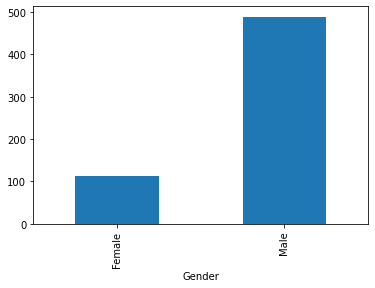

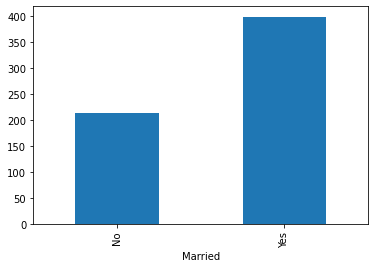

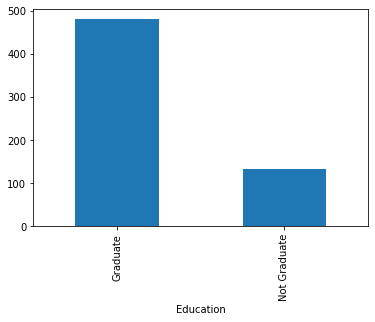

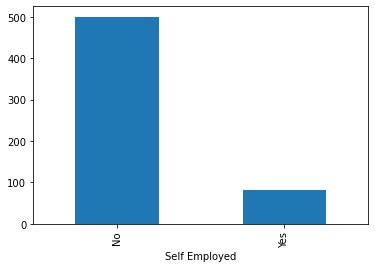

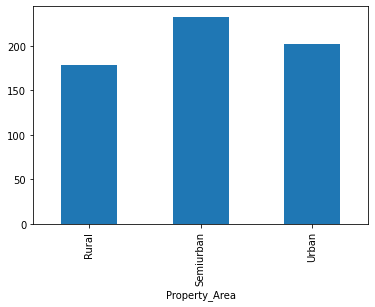

In [15]:
# realizamos diagramas de barras para revisar la distribución de frecuencias de cada variable cualitativas
for var in lista_cualitativas:
    df_creditos.groupby(var)['Loan_Status'].count().plot.bar()
    plt.show()

Visualizando los gráficos podemos llegar a las siguientes conclusiones:
* Hay un mayor porcentaje de aceptación de créditos a hombres que a mujeres.
* Se brinda una mayor cantidad de préstamos a personas casadas.
* A menor cantidad de dependientes es más probable que la persona pueda obtener el crédito.
* Se brinda el préstamo en mayor proporción a personas graduadas.
* Se brinda el préstamo en menor proporción a personas con empleo independiente.
* Las personas que residen en áreas semiurbanas tienen mayor cantidad de préstamos.
* La cantidad de préstamos aceptados es mayor.

#### Revisando las variables cuantitativas

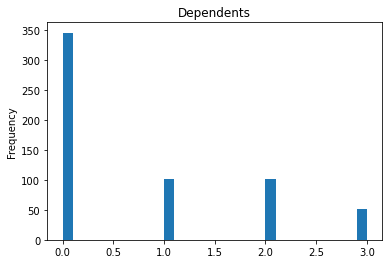

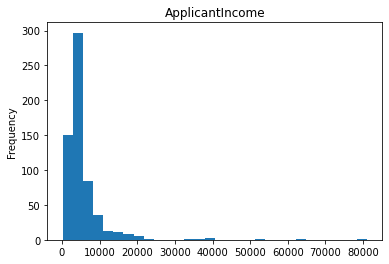

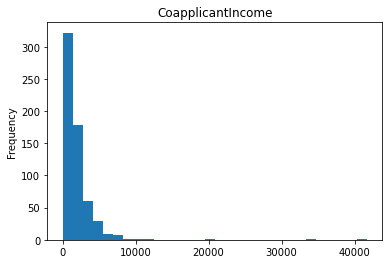

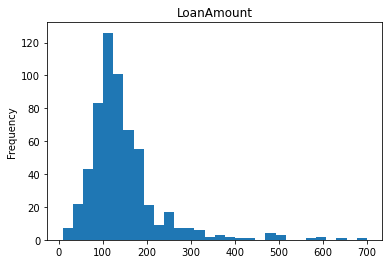

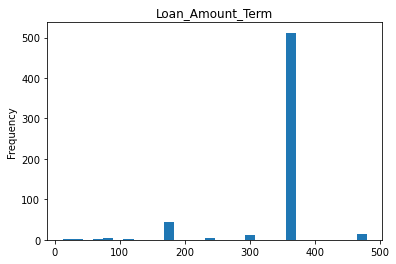

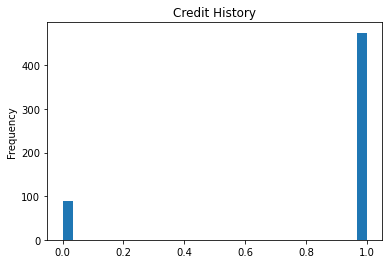

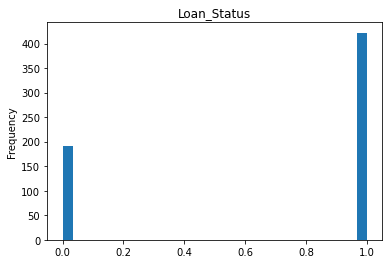

In [16]:
# realizamos histogramas para revisar la distribución de cada variable cuantitativa
for var in lista_cuantitativas:
    df_creditos[var].plot(kind='hist', title=var, bins=30)
    plt.show()

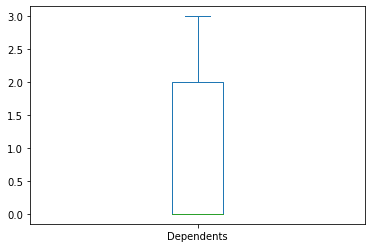

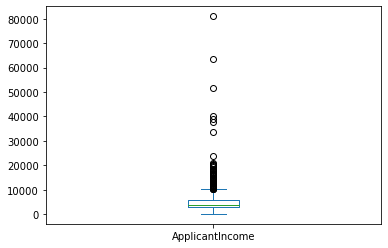

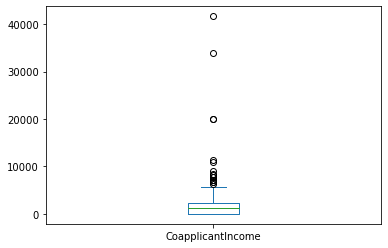

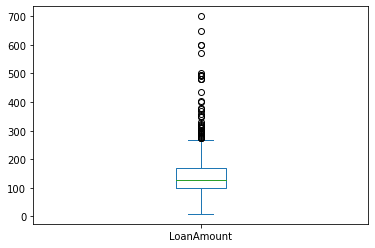

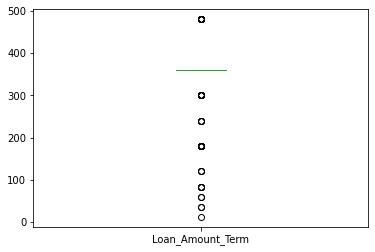

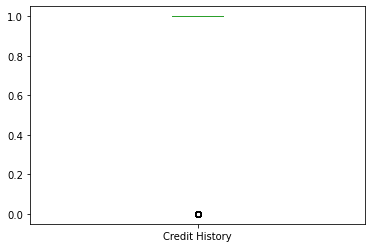

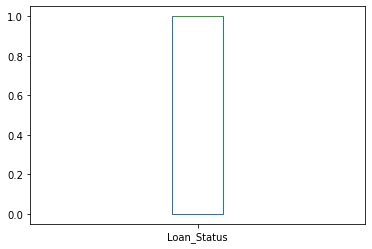

In [17]:
# realizamos diagrama de cajas para revisar posibles outliers de cada variables cuantitativas
for var in lista_cuantitativas:
    df_creditos[var].plot(kind='box')
    plt.show()

Con estos gráficos podemos revisar la distribución de la variables cuantitativas y posibles outliers en algunas variables como 'ApplicantIncome' y 'Coapplicantincome'.

#### Revisando las variables cuantitativas con la variable objetivo

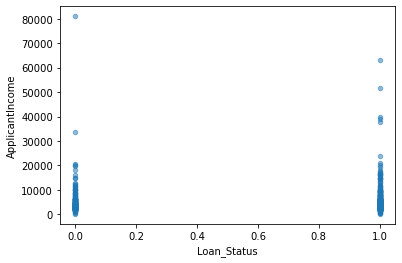

In [18]:
# Revisamos ApplicantIncome / Loan_Status
var = 'ApplicantIncome'
data = pd.concat([df_creditos['Loan_Status'], df_creditos[var]], axis=1)
data.plot.scatter(y=var, x='Loan_Status', alpha = 0.5);

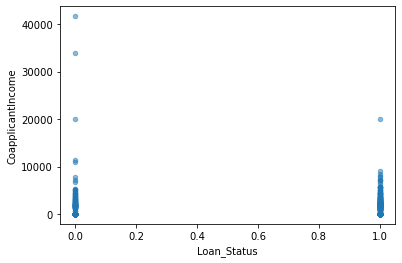

In [19]:
# Revisamos CoapplicantIncome / Loan_Status
var = 'CoapplicantIncome'
data = pd.concat([df_creditos['Loan_Status'], df_creditos[var]], axis=1)
data.plot.scatter(y=var, x='Loan_Status', alpha = 0.5);

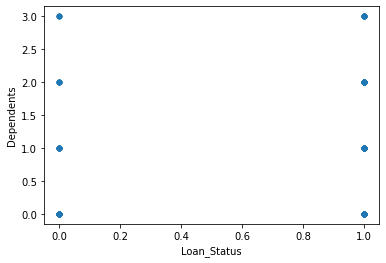

In [20]:
# Revisamos Dependents / Loan_Status
var = 'Dependents'
data = pd.concat([df_creditos['Loan_Status'], df_creditos[var]], axis=1)
data.plot.scatter(y=var, x='Loan_Status', alpha = 0.5);

### Resumiendo
* Las variables'ApplicationIncome' y 'CoapplicationIncome' mantienen una relación positiva con 'Loan_Status', 
* La variable 'Dependents' mantiene una relacion positiva

### 5. ANÁLISIS DE ASOCIACIÓN O CORRELACIÓN 

In [21]:
# Visualizamos la tabla de correlación de las variables
df_creditos.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


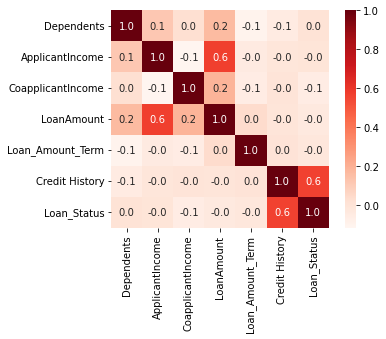

In [22]:
# Matriz de correlación 

corr=df_creditos.corr()
sns.heatmap(corr, annot=corr,fmt='.1f', square=True, cmap='Reds',annot_kws = {"size": 10})
plt.show()

In [23]:
corr = df_creditos.corr()
corr[['Loan_Status']].sort_values(by = 'Loan_Status',ascending = False).style.background_gradient()

,Loan_Status
Loan_Status,1.000000
Credit History,0.561678
Dependents,0.006781
ApplicantIncome,-0.004710
Loan_Amount_Term,-0.021268
LoanAmount,-0.037318
CoapplicantIncome,-0.059187


##### En la matriz de correlación se puede observar lo siguiente: 
* 'Dependents' mantiene una correlación regular se puede tomar como una 'Variable considerable'
* 'ApplicantIncome' mantiene una alta correlación por lo tanto se considera una 'Variable buena'
* 'CoapplicantIncome' mantiene correlación regular también se puede tomar como una 'Variable considerable'
* 'LoanAmount' mantiene una alta correlación y lo consideramos una 'Variable buena'
* 'Loan_Amount_Term' mantine una baja correlación se puede considerar una varible con posible descarte
* 'Credit History' mantiene una alta correlación entonces consideramos 'Variable buena'
* 'Loan_Status' es la 'Variable objetivo'

#### Diagramas de dispersión entre 'Loan_Status' y sus variables correlacionadas

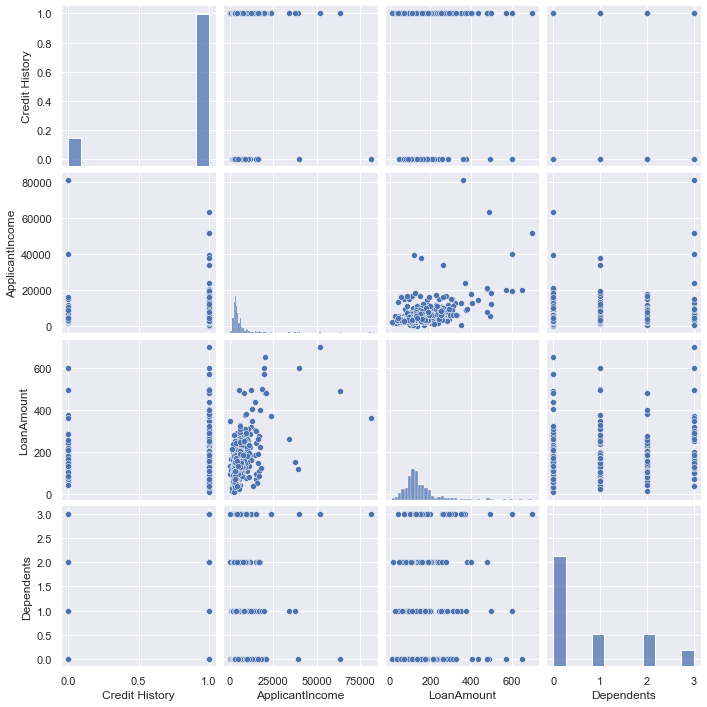

In [24]:
sns.set()
cols = ['Credit History', 'ApplicantIncome', 'LoanAmount', 'Dependents']
sns.pairplot(df_creditos[cols], height = 2.5)
plt.show()

### 6. ANÁLISIS DE POSIBLES VALORES ATÍPICOS

In [25]:
#Visualizamos los posibles valores atípicos en las varibles principales

total = df_creditos.isnull().sum().sort_values(ascending = False)
percent = (df_creditos.isnull().sum() / df_creditos.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Credit History,50,0.081433
Self Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


Revisando la información se observa que los valores nulos da un porcentaje menor al 10% por lo que no se consideraría eliminar ninguna variable ya que la mayoría de estas mantienen una correlación considerable respecto a la variable objetivo.
Las variables 'Credit History', 'ApplicantIncome', 'LoanAmount' y 'Dependents' se consideran variables esenciales y con mayor correlación que nos permiten un mejor análisis del caso.

### 7.PRINCIPALES DRIVERS O FACTORES DE CONCLUSIÓN DEL PROBLEMA

Podemos concluir que la aprobación  de créditos se da en base a los siguientes principales drivers o factores:
* 1.El historial creticio del cliente
* 2.Los ingresos dependientes e independientes del cliente
* 3.La cantidad de dependientes del cliente
* 4.El monto del crédito solicitado
* 5.El nivel de educación del cliente 
Estos factores nos ayudarán a decidir si el crédito es aprobado o desaprobado.